<a href="https://colab.research.google.com/github/madicodes231/Homework1/blob/main/Homework55New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

15.18

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.datasets import load_iris

iris= load_iris()

In [ ]:
k_values = range(1, 11)

In [ ]:
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

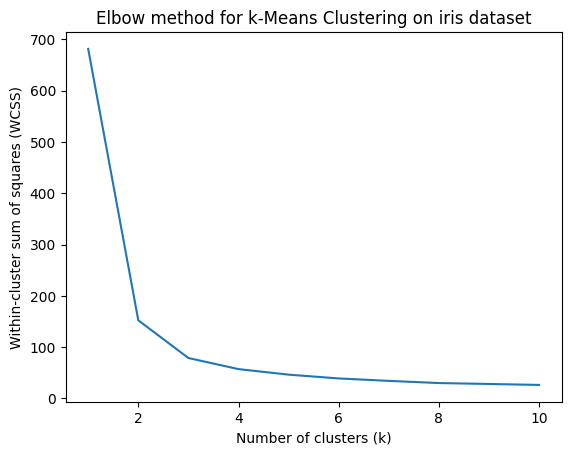

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method for k-Means Clustering on iris dataset')
plt.show()

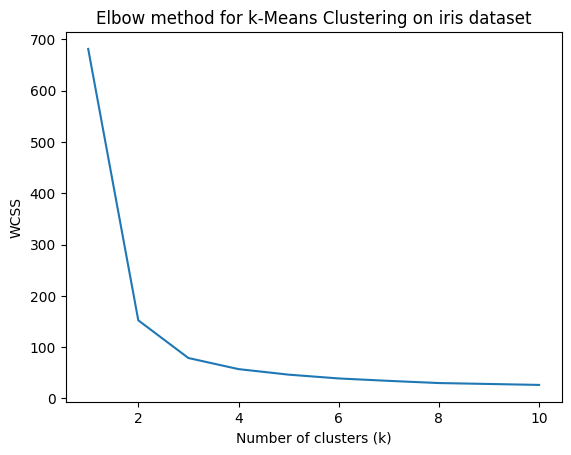

In [ ]:
# Plot the WCSS vs k values
import matplotlib.pyplot as plt

plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow method for k-Means Clustering on iris dataset')
plt.show()

15.21

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist.target[::100]

0        5
100      5
200      1
300      8
400      2
        ..
69500    2
69600    5
69700    2
69800    0
69900    8
Name: class, Length: 700, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
mnist.data.shape

(70000, 784)

In [2]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
n_components = 50  # Number of principal components to keep
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [5]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=100)
start_time = time.time()  # Record start time
logisticRegr.fit(X_train_pca, y_train)
end_time = time.time()  # Record end time

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
y_pred = logisticRegr.predict(X_test_pca)

In [7]:
accuracy = accuracy_score(y_test, y_pred)

In [8]:
time_with_pca = end_time - start_time

In [9]:
start_time = time.time()  # Record start time
logisticRegr.fit(X_train_scaled, y_train)
end_time = time.time()  # Record end time

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
y_pred_without_pca = logisticRegr.predict(X_test_scaled)

In [11]:
accuracy_without_pca = accuracy_score(y_test, y_pred_without_pca)

In [12]:
time_without_pca = end_time - start_time

In [13]:
print(f"Accuracy with PCA: {accuracy:.4f}")
print(f"Time with PCA: {time_with_pca:.2f} seconds")
print(f"Accuracy without PCA: {accuracy_without_pca:.4f}")
print(f"Time without PCA: {time_without_pca:.2f} seconds")

Accuracy with PCA: 0.9054
Time with PCA: 6.35 seconds
Accuracy without PCA: 0.9154
Time without PCA: 40.08 seconds
